In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import os

import librosa
import librosa.display

import seaborn as sns

In [2]:
ds_path = '/home/edoardobucheli/Datasets/FSDKaggle2018/'

In [3]:
train_data = pd.read_csv(os.path.join(ds_path,'train_post_competition.csv'))
test_data = pd.read_csv(os.path.join(ds_path,'test_post_competition_scoring_clips.csv'))

# Train Data

In [4]:
train_data.head()

,fname,label,manually_verified,freesound_id,license
0,00044347.wav,Hi-hat,0,28739,Attribution
1,001ca53d.wav,Saxophone,1,358827,Attribution
2,002d256b.wav,Trumpet,0,10897,Creative Commons 0
3,0033e230.wav,Glockenspiel,1,325017,Attribution
4,00353774.wav,Cello,1,195688,Attribution


### General Properties

In [5]:
print('Num of training examples: {}'.format(len(train_data)))

classes = np.unique(train_data['label'].tolist())
print('Num of Classes: {}'.format(len(classes)))

is_manually_verified = train_data['manually_verified'] == 1
print('Manually Verified Examples: {}'.format(np.sum(is_manually_verified)))
is_not_manually_verified = train_data['manually_verified'] == 0
print('Not Manually Verified Examples: {}'.format(np.sum(is_not_manually_verified)))

Num of training examples: 9473
Num of Classes: 41
Manually Verified Examples: 3710
Not Manually Verified Examples: 5763


### Manual vs Automatic Labels

In [6]:
manual_train = train_data[is_manually_verified]
automatic_train = train_data[is_not_manually_verified]

In [7]:
classes_overall, counts_overall = np.unique(train_data['label'].tolist(), return_counts=True)
classes_manual, counts_manual = np.unique(manual_train['label'].tolist(), return_counts=True)
classes_auto, counts_auto = np.unique(automatic_train['label'].tolist(), return_counts=True)

In [8]:
print('Overall:')

print('\tAverage per class: {:0.2f}'.format(np.mean(counts_overall)))
print('\tStandard Deviation: {:0.2f}'.format(np.std(counts_overall)))
print('\tMedian: {:0.0f}'.format(np.median(counts_overall)))
print('\tClass with Most Instances: {} = {}'.format(classes_manual[np.argmax(counts_overall)], np.max(counts_overall)))
print('\tClass with Least Instances: {} = {}'.format(classes_manual[np.argmin(counts_overall)], np.min(counts_overall)))

print('\nManual:')

print('\tAverage per class: {:0.2f}'.format(np.mean(counts_manual)))
print('\tStandard Deviation: {:0.2f}'.format(np.std(counts_manual)))
print('\tMedian: {:0.0f}'.format(np.median(counts_manual)))
print('\tClass with Most Instances: {} = {}'.format(classes_manual[np.argmax(counts_manual)], np.max(counts_manual)))
print('\tClass with Least Instances: {} = {}'.format(classes_manual[np.argmin(counts_manual)], np.min(counts_manual)))

print('\nAutomatic:')

print('\tAverage por class: {:0.2f}'.format(np.mean(counts_auto)))
print('\tStandard Deviation: {:0.2f}'.format(np.std(counts_auto)))
print('\tMedian: {:0.0f}'.format(np.median(counts_auto)))
print('\tClass with Most Instances: {} = {}'.format(classes_manual[np.argmax(counts_auto)], np.max(counts_auto)))
print('\tClass with Least Instances: {} = {}'.format(classes_manual[np.argmin(counts_auto)], np.min(counts_auto)))

Overall:
	Average per class: 231.05
	Standard Deviation: 77.84
	Median: 279
	Class with Most Instances: Acoustic_guitar = 300
	Class with Least Instances: Glockenspiel = 94

Manual:
	Average per class: 90.49
	Standard Deviation: 42.33
	Median: 75
	Class with Most Instances: Saxophone = 256
	Class with Least Instances: Bus = 59

Automatic:
	Average por class: 140.56
	Standard Deviation: 77.48
	Median: 172
	Class with Most Instances: Applause = 239
	Class with Least Instances: Gunshot_or_gunfire = 2


### Class Distribution

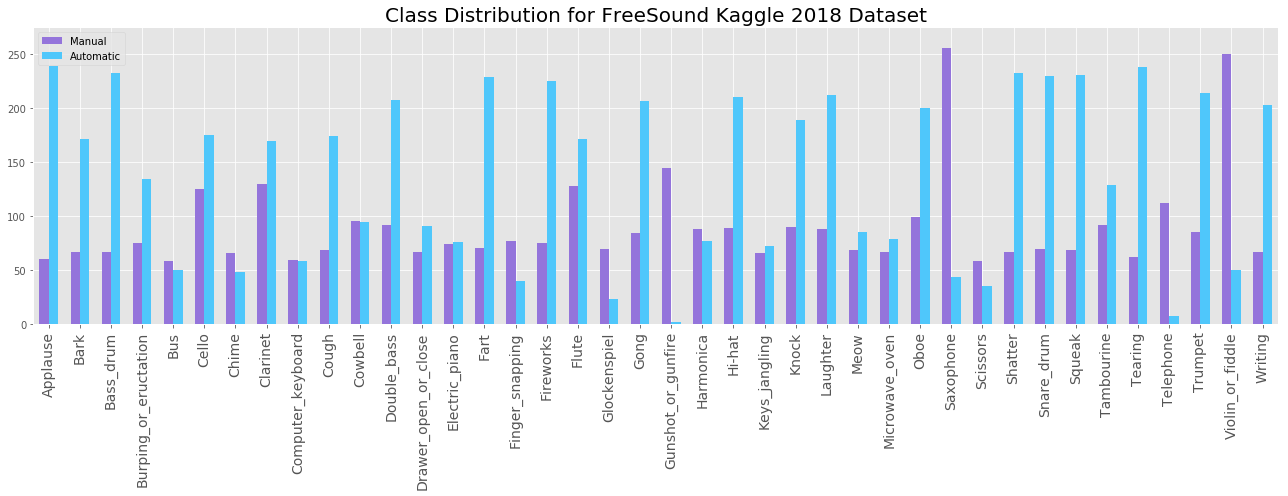

In [9]:
x = np.arange(41)
width = 0.3

fig,ax = plt.subplots(1,1,figsize = (18,7))

rects1 = ax.bar(x-0.5*width,counts_manual, width, label = 'Manual', color ='#9474DB', zorder = 2)
rects2 = ax.bar(x+0.5*width,counts_auto, width, label = 'Automatic', color ='#4FC7FB',zorder = 2)


ax.set_title('Class Distribution for FreeSound Kaggle 2018 Dataset', fontsize = 20)
#plt.grid(axis = 'y', alpha = 0.7,zorder=0)

fig = ax.set_xticks(x)
fig = ax.set_xticklabels(classes,rotation = 90, fontsize = 14)
fig = ax.legend(loc = 'upper left')
fig = ax.set(xlim = [0.5,40.5], ylim = [0,275])

plt.tight_layout()
plt.savefig('./FSDKagle2018_classdistribution.eps')

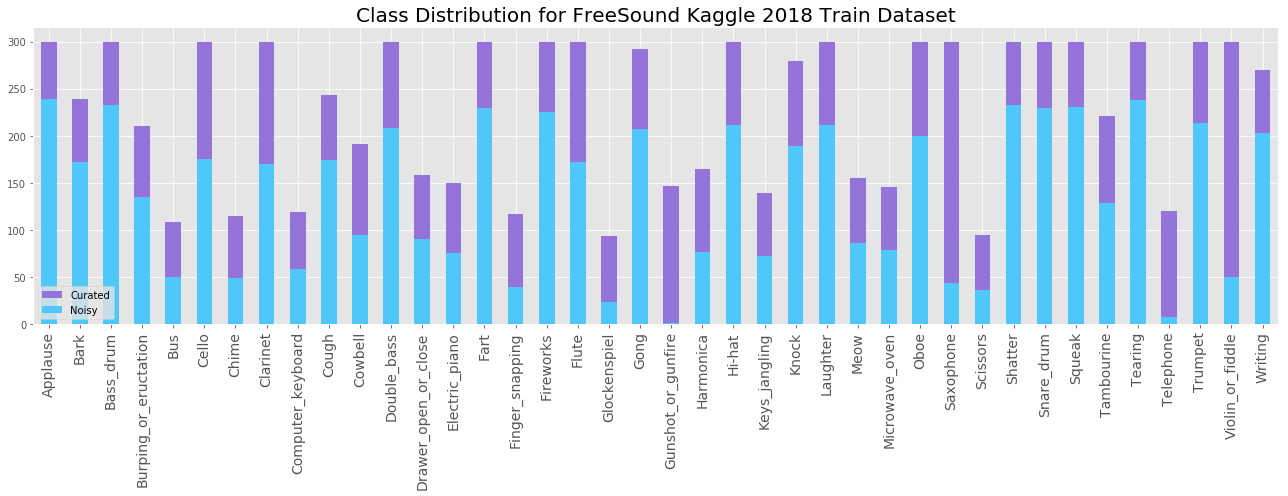

In [136]:
x = np.arange(41)
width = 0.5

fig,ax = plt.subplots(1,1,figsize = (18,7))

rects1 = ax.bar(x,counts_manual+counts_auto, width, label = 'Curated', color ='#9474DB', zorder = 2)
rects2 = ax.bar(x,counts_auto, width, label = 'Noisy', color ='#4FC7FB',zorder = 2)


ax.set_title('Class Distribution for FreeSound Kaggle 2018 Train Dataset', fontsize = 20)
#plt.grid(axis = 'y', alpha = 0.7,zorder=0)

fig = ax.set_xticks(x)
fig = ax.set_xticklabels(classes,rotation = 90, fontsize = 14)
fig = ax.legend(loc = 'lower left')
fig = ax.set(xlim = [0.5,40.5])#, ylim = [0,275])

plt.tight_layout()
plt.savefig('./FSDKagle2018_classdistribution_v2.eps')

### Clip Properties

In [26]:
from scipy.io.wavfile import read as wavread
from tqdm import tqdm_notebook
from IPython.display import Audio

In [27]:
train_files = train_data['fname'].tolist()

In [28]:
train_wavs = []
train_lengths = []

for i, file in enumerate(tqdm_notebook(train_files)):
    sr, this_wav = wavread(os.path.join(ds_path,'audio_train', file))
    
    train_wavs.append(this_wav)
    train_lengths.append(len(this_wav))

In [29]:
train_lengths_s = np.array(train_lengths)/sr
print('Average: {:0.2f}'.format(np.mean(train_lengths_s)))
print('Std: {:0.2f}'.format(np.std(train_lengths_s)))
print('Median: {:0.2f}'.format(np.median(train_lengths_s)))

Average: 6.79
Std: 7.04
Median: 4.06


In [30]:
print('Shortest Example [samples]: {}'.format(np.min(train_lengths)))
print('Shortest Example [seconds]: {}'.format(np.min(train_lengths)/sr))

Shortest Example [samples]: 13230
Shortest Example [seconds]: 0.3


In [31]:
print('Longest Example [samples]: {}'.format(np.max(train_lengths)))
print('Longest Example [seconds]: {}'.format(np.max(train_lengths)/sr))

Longest Example [samples]: 1323000
Longest Example [seconds]: 30.0


In [32]:
train_data['File Length [samples]'] = train_lengths
train_data['File Length [s]'] = np.array(train_lengths)/sr

In [33]:
train_data.head()

,fname,label,manually_verified,freesound_id,license,File Length [samples],File Length [s]
0,00044347.wav,Hi-hat,0,28739,Attribution,617400,14.00
1,001ca53d.wav,Saxophone,1,358827,Attribution,455112,10.32
2,002d256b.wav,Trumpet,0,10897,Creative Commons 0,19404,0.44
3,0033e230.wav,Glockenspiel,1,325017,Attribution,352800,8.00
4,00353774.wav,Cello,1,195688,Attribution,199332,4.52


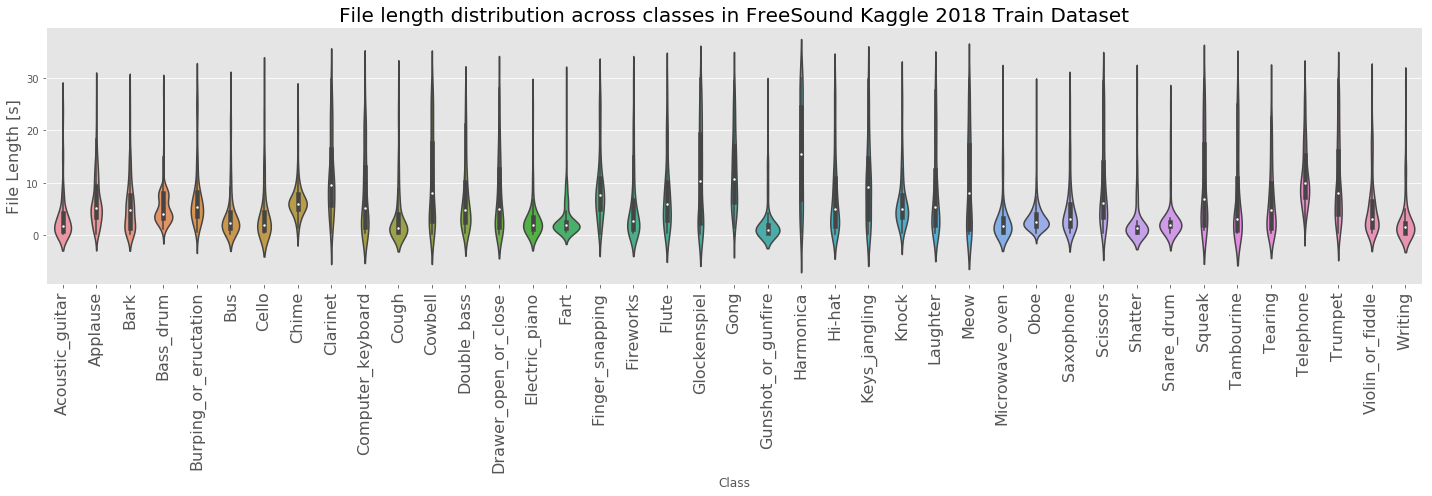

In [139]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.violinplot(x="label", y="File Length [s]", data=train_data, fontsize=16, scale = 'area')
fig = ax.set_title('File length distribution across classes in FreeSound Kaggle 2018 Train Dataset', fontsize = 20)
fig = ax.set_xticks(np.arange(41))
fig = ax.set_xticklabels(classes,rotation = 90, fontsize = 16)
fig = ax.set_xlabel('Class')
fig = ax.set_ylabel('File Length [s]',fontsize = 16)
plt.tight_layout()
plt.savefig('./ViolinFSDK2018.eps')

### Curated File Lengths

In [122]:
train_files_curated = manual_train['fname'].tolist()

cur_wavs = []
cur_lengths = []

for i, file in enumerate(tqdm_notebook(train_files_curated)):
    sr, this_wav = wavread(os.path.join(ds_path,'audio_train', file))
    
    cur_wavs.append(this_wav)
    cur_lengths.append(len(this_wav))

In [128]:
manual_train['File Length [samples]'] = cur_lengths
manual_train['File Length [s]'] = np.array(cur_lengths)/sr

/home/edoardobucheli/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/edoardobucheli/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [126]:
total_length_curated = []

for this_class in classes:
    this_data = manual_train[manual_train['label'] == this_class]
    total_length_curated.append(np.sum(this_data['File Length [s]']))

### Noisy File Lengths

In [130]:
train_files_noisy = automatic_train['fname'].tolist()

noisy_wavs = []
noisy_lengths = []

for i, file in enumerate(tqdm_notebook(train_files_noisy)):
    sr, this_wav = wavread(os.path.join(ds_path,'audio_train', file))
    
    noisy_wavs.append(this_wav)
    noisy_lengths.append(len(this_wav))

In [131]:
automatic_train['File Length [samples]'] = noisy_lengths
automatic_train['File Length [s]'] = np.array(noisy_lengths)/sr

/home/edoardobucheli/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/edoardobucheli/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [132]:
total_length_noisy = []

for this_class in classes:
    this_data = automatic_train[automatic_train['label'] == this_class]
    total_length_noisy.append(np.sum(this_data['File Length [s]']))

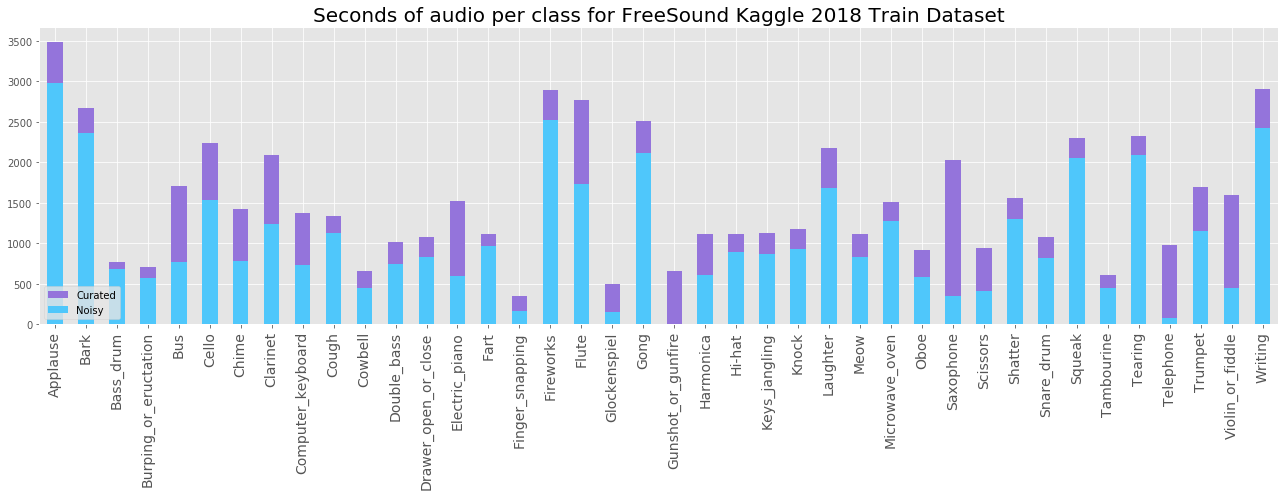

In [146]:
x = np.arange(41)
width = 0.5

fig,ax = plt.subplots(1,1,figsize = (18,7))

rects1 = ax.bar(x,[f+g for f,g in zip(total_length_curated,total_length_noisy)], width, label = 'Curated', color ='#9474DB', zorder = 2)
rects2 = ax.bar(x,total_length_noisy, width, label = 'Noisy', color ='#4FC7FB',zorder = 2)


ax.set_title('Seconds of audio per class for FreeSound Kaggle 2018 Train Dataset', fontsize = 20)
#plt.grid(axis = 'y', alpha = 0.7,zorder=0)

fig = ax.set_xticks(x)
fig = ax.set_xticklabels(classes,rotation = 90, fontsize = 14)
fig = ax.legend(loc = 'lower left')
fig = ax.set(xlim = [0.5,40.5])#, ylim = [0,275])

plt.tight_layout()
plt.savefig('./FSDKagle2018_filelength_train.eps')

## Test Data

In [48]:
test_data = pd.read_csv(os.path.join(ds_path,'test_post_competition_scoring_clips.csv'))

In [49]:
test_data.head()

,fname,label,usage,freesound_id,license
0,00326aa9.wav,Oboe,Private,355125,Attribution
1,0038a046.wav,Bass_drum,Private,90621,Creative Commons 0
2,007759c4.wav,Saxophone,Private,13406,Creative Commons 0
3,008afd93.wav,Saxophone,Private,358962,Attribution
4,00ae03f6.wav,Chime,Private,78203,Attribution


### General Properties

In [51]:
print('Num of test examples: {}'.format(len(test_data)))

classes = np.unique(test_data['label'].tolist())
print('Num of Classes: {}'.format(len(classes)))

#is_manually_verified = test_data['manually_verified'] == 1
#print('Manually Verified Examples: {}'.format(np.sum(is_manually_verified)))
#is_not_manually_verified = train_data['manually_verified'] == 0
#print('Not Manually Verified Examples: {}'.format(np.sum(is_not_manually_verified)))

Num of test examples: 1600
Num of Classes: 41


In [53]:
classes_test, counts_test = np.unique(test_data['label'].tolist(), return_counts=True)

In [54]:
print('Test:')

print('\tAverage per class: {:0.2f}'.format(np.mean(counts_test)))
print('\tStandard Deviation: {:0.2f}'.format(np.std(counts_test)))
print('\tMedian: {:0.0f}'.format(np.median(counts_test)))
print('\tClass with Most Instances: {} = {}'.format(classes_test[np.argmax(counts_test)], np.max(counts_test)))
print('\tClass with Least Instances: {} = {}'.format(classes_test[np.argmin(counts_test)], np.min(counts_test)))

Test:
	Average per class: 39.02
	Standard Deviation: 18.22
	Median: 32
	Class with Most Instances: Saxophone = 110
	Class with Least Instances: Bus = 25


### Class Distribution

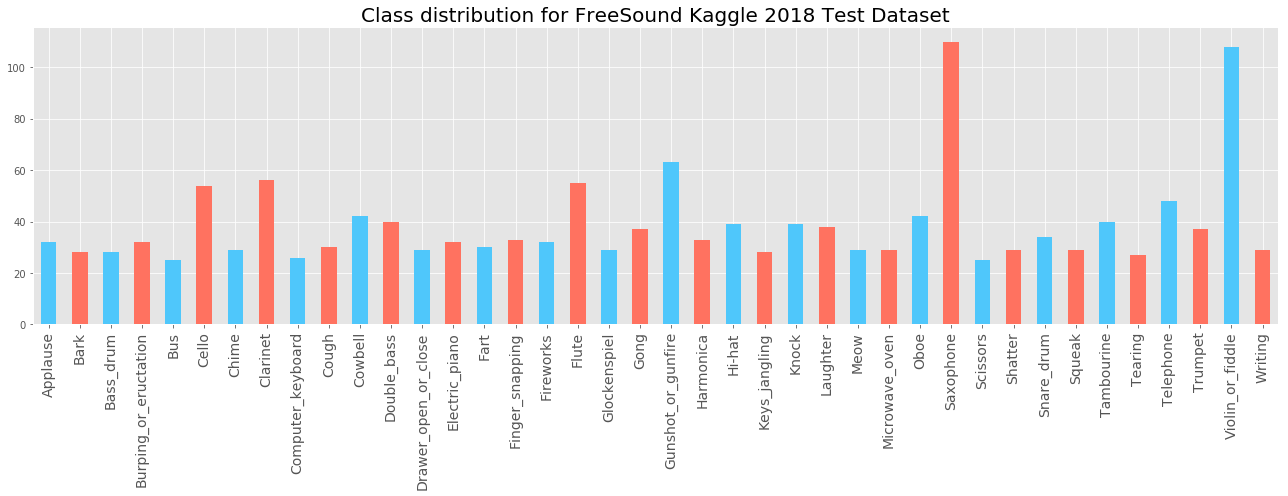

In [145]:
x = np.arange(41)
width = 0.5

fig,ax = plt.subplots(1,1,figsize = (18,7))

rects1 = ax.bar(x,counts_test, width, label = 'Manual', color =['#FF7260','#4FC7FB'], zorder = 2)
#rects2 = ax.bar(x+0.5*width,counts_auto, width, label = 'Automatic', color ='#4FC7FB',zorder = 2)


ax.set_title('Class distribution for FreeSound Kaggle 2018 Test Dataset', fontsize = 20)
#plt.grid(axis = 'y', alpha = 0.7,zorder=0)

fig = ax.set_xticks(x)
fig = ax.set_xticklabels(classes,rotation = 90, fontsize = 14)
#fig = ax.legend(loc = 'upper left')
fig = ax.set(xlim = [0.5,40.5])#, ylim = [0,275])

plt.tight_layout()
plt.savefig('./FSDKagle2018_test_classdistribution.eps')

### Clip Properties

In [87]:
from scipy.io.wavfile import read as wavread
from tqdm import tqdm_notebook
from IPython.display import Audio

In [88]:
test_files = test_data['fname'].tolist()

In [89]:
test_wavs = []
test_lengths = []

for i, file in enumerate(tqdm_notebook(test_files)):
    sr, this_wav = wavread(os.path.join(ds_path,'audio_test', file))
    
    test_wavs.append(this_wav)
    test_lengths.append(len(this_wav))

In [90]:
test_lengths_s = np.array(test_lengths)/sr
print('Average: {:0.2f}'.format(np.mean(test_lengths_s)))
print('Std: {:0.2f}'.format(np.std(test_lengths_s)))
print('Median: {:0.2f}'.format(np.median(test_lengths_s)))

Average: 5.20
Std: 5.47
Median: 3.44


In [91]:
print('Shortest Example [samples]: {}'.format(np.min(test_lengths)))
print('Shortest Example [seconds]: {}'.format(np.min(test_lengths)/sr))

Shortest Example [samples]: 13230
Shortest Example [seconds]: 0.3


In [92]:
print('Longest Example [samples]: {}'.format(np.max(test_lengths)))
print('Longest Example [seconds]: {}'.format(np.max(test_lengths)/sr))

Longest Example [samples]: 1311534
Longest Example [seconds]: 29.74


In [95]:
test_data['File Length [samples]'] = test_lengths
test_data['File Length [s]'] = np.array(test_lengths)/sr

In [96]:
test_data.head()

,fname,label,usage,freesound_id,license,File Length [samples],File Length [s]
0,00326aa9.wav,Oboe,Private,355125,Attribution,91728,2.08
1,0038a046.wav,Bass_drum,Private,90621,Creative Commons 0,171990,3.90
2,007759c4.wav,Saxophone,Private,13406,Creative Commons 0,442764,10.04
3,008afd93.wav,Saxophone,Private,358962,Attribution,416304,9.44
4,00ae03f6.wav,Chime,Private,78203,Attribution,392490,8.90


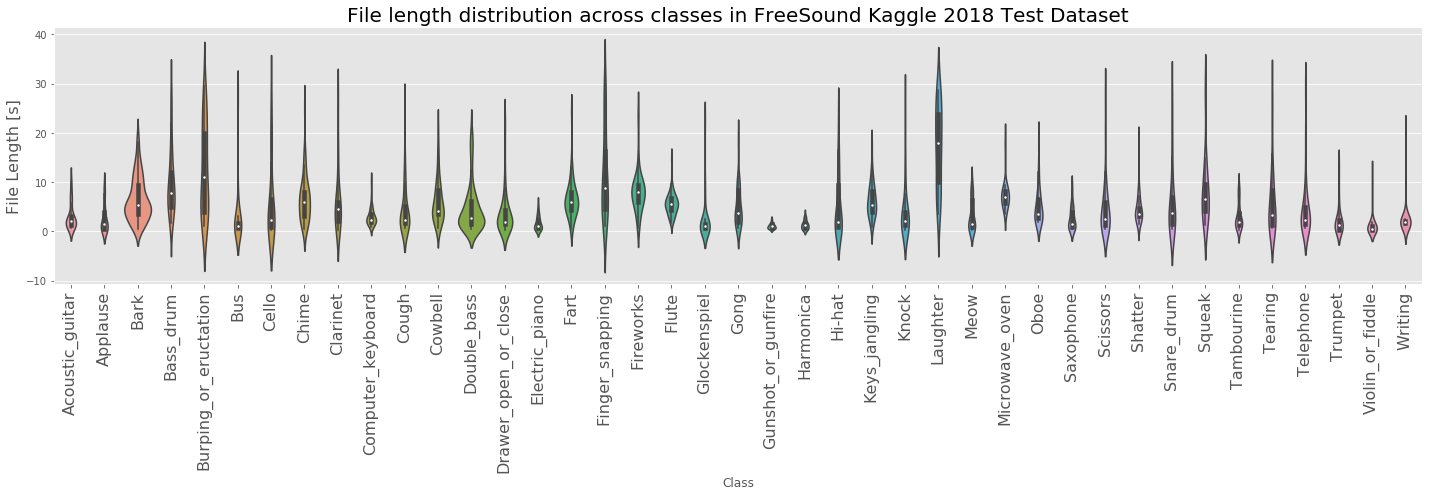

In [141]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.violinplot(x="label", y="File Length [s]", data=test_data, fontsize=16, scale = 'count')
fig = ax.set_title('File length distribution across classes in FreeSound Kaggle 2018 Test Dataset', fontsize = 20)
fig = ax.set_xticks(np.arange(41))
fig = ax.set_xticklabels(classes,rotation = 90, fontsize = 16)
fig = ax.set_xlabel('Class')
fig = ax.set_ylabel('File Length [s]',fontsize = 16)
plt.tight_layout()
plt.savefig('./ViolinFSDK2018test.eps')

In [112]:
classes

array(['Acoustic_guitar', 'Applause', 'Bark', 'Bass_drum',
       'Burping_or_eructation', 'Bus', 'Cello', 'Chime', 'Clarinet',
       'Computer_keyboard', 'Cough', 'Cowbell', 'Double_bass',
       'Drawer_open_or_close', 'Electric_piano', 'Fart',
       'Finger_snapping', 'Fireworks', 'Flute', 'Glockenspiel', 'Gong',
       'Gunshot_or_gunfire', 'Harmonica', 'Hi-hat', 'Keys_jangling',
       'Knock', 'Laughter', 'Meow', 'Microwave_oven', 'Oboe', 'Saxophone',
       'Scissors', 'Shatter', 'Snare_drum', 'Squeak', 'Tambourine',
       'Tearing', 'Telephone', 'Trumpet', 'Violin_or_fiddle', 'Writing'],
      dtype='<U21')

In [118]:
total_length = []

for this_class in classes:
    this_data = test_data[test_data['label'] == this_class]
    total_length.append(np.sum(this_data['File Length [s]']))

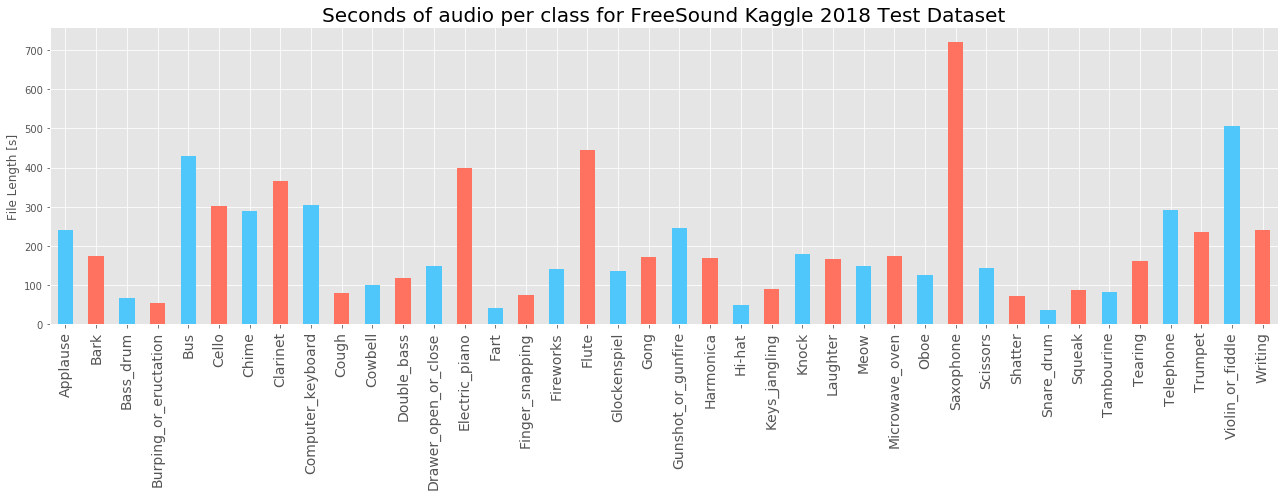

In [147]:
x = np.arange(41)
width = 0.5

fig,ax = plt.subplots(1,1,figsize = (18,7))

rects1 = ax.bar(x,total_length, width, label = 'Manual', color =['#FF7260','#4FC7FB'], zorder = 2)
#rects2 = ax.bar(x+0.5*width,counts_auto, width, label = 'Automatic', color ='#4FC7FB',zorder = 2)


ax.set_title('Seconds of audio per class for FreeSound Kaggle 2018 Test Dataset', fontsize = 20)
#plt.grid(axis = 'y', alpha = 0.7,zorder=0)

fig = ax.set_xticks(x)
fig = ax.set_xticklabels(classes,rotation = 90, fontsize = 14)
fig = ax.set_ylabel('File Length [s]')
#fig = ax.legend(loc = 'upper left')
fig = ax.set(xlim = [0.5,40.5])#, ylim = [0,275])

plt.tight_layout()
plt.savefig('./FSDKagle2018_filelength_test.eps')

In [119]:
total_length

[302.54,
 239.54,
 174.54000000000002,
 68.48,
 54.04,
 428.74,
 302.03999999999996,
 289.8999999999999,
 364.94,
 304.54,
 81.3,
 99.86,
 118.14,
 147.88,
 399.26,
 41.22,
 75.17999999999999,
 140.74,
 444.0399999999999,
 136.78,
 171.48000000000002,
 246.44,
 170.42,
 50.4,
 91.36,
 178.42000000000004,
 167.72000000000003,
 150.2,
 175.5,
 126.69999999999999,
 721.2199999999999,
 144.72,
 72.21999999999998,
 37.400000000000006,
 88.08,
 83.32,
 162.09999999999997,
 292.96,
 234.82000000000002,
 505.56,
 241.17999999999995]

In [115]:
data_class0 = test_data[test_data['label'] == classes[0]]

In [117]:
np.sum(data_class0['File Length [s]'])

302.54